In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/MobilityData.xlsx', sheet_name='Master', header=[0,1])
df.dropna(axis=1, how='all', inplace=True)

In [17]:
central_tot = 511660
east_tot = 488330
north_central_tot = 646380
north_coastal_tot = 535219
north_inland_tot = 602000
south_tot = 500076

In [18]:
central = pd.concat([df.iloc[:, 0], df.iloc[:, 2:7]], axis=1)
east = pd.concat([df.iloc[:, 0], df.iloc[:, 7:12]], axis=1)
n_central = pd.concat([df.iloc[:, 0], df.iloc[:, 12:17]], axis=1)
n_coastal = pd.concat([df.iloc[:, 0], df.iloc[:, 17:22]], axis=1)
n_inland = pd.concat([df.iloc[:, 0], df.iloc[:, 22:27]], axis=1)
south = pd.concat([df.iloc[:, 0], df.iloc[:, 27:32]], axis=1)

In [19]:
central['Ratio Moved (to East)'] = central['Central', 'East'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Central)'] = central['Central', 'North Central'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Coastal)'] = central['Central', 'North Coastal'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Inland)'] = central['Central', 'North Inland'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to South)'] = central['Central', 'South'].apply(lambda x: 100*(x/central_tot))

east['Ratio Moved (to Central)'] = east['East', 'Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Central)'] = east['East', 'North Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Coastal)'] = east['East', 'North Coastal'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Inland)'] = east['East', 'North Inland'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to South)'] = east['East', 'South'].apply(lambda x: 100*(x/east_tot))

n_central['Ratio Moved (to Central)'] = n_central['North Central', 'Central'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to East)'] = n_central['North Central', 'East'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Coastal)'] = n_central['North Central', 'North Coastal'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Inland)'] = n_central['North Central', 'North Inland'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to South)'] = n_central['North Central', 'South'].apply(lambda x: 100*(x/north_central_tot))

n_coastal['Ratio Moved (to Central)'] = n_coastal['North Coastal', 'Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to East)'] = n_coastal['North Coastal', 'East'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Central)'] = n_coastal['North Coastal', 'North Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Inland)'] = n_coastal['North Coastal', 'North Inland'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to South)'] = n_coastal['North Coastal', 'South'].apply(lambda x: 100*(x/north_coastal_tot))

n_inland['Ratio Moved (to Central)'] = n_inland['North Inland', 'Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to East)'] = n_inland['North Inland', 'East'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Central)'] = n_inland['North Inland', 'North Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Coastal)'] = n_inland['North Inland', 'North Coastal'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to South)'] = n_inland['North Inland', 'South'].apply(lambda x: 100*(x/north_inland_tot))

south['Ratio Moved (to Central)'] = south['South', 'Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to East)'] = south['South', 'East'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Central)'] = south['South', 'North Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Coastal)'] = south['South', 'North Coastal'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Inland)'] = south['South', 'North Inland'].apply(lambda x: 100*(x/south_tot))

In [20]:
result = pd.concat([central.iloc[:, 6:], east.iloc[:, 6:], n_central.iloc[:, 6:], n_coastal.iloc[:, 6:], n_inland.iloc[:, 6:], south.iloc[:, 6:]], axis=1)

In [21]:
print('Max: ', max(result.max()))
print('Min: ', min(result.min()))
print('Avg: ', sum(result.sum()) / (result.shape[0] * result.shape[1]))

Max:  1.426903937910839
Min:  0.01439781153264704
Avg:  0.3120317933159559


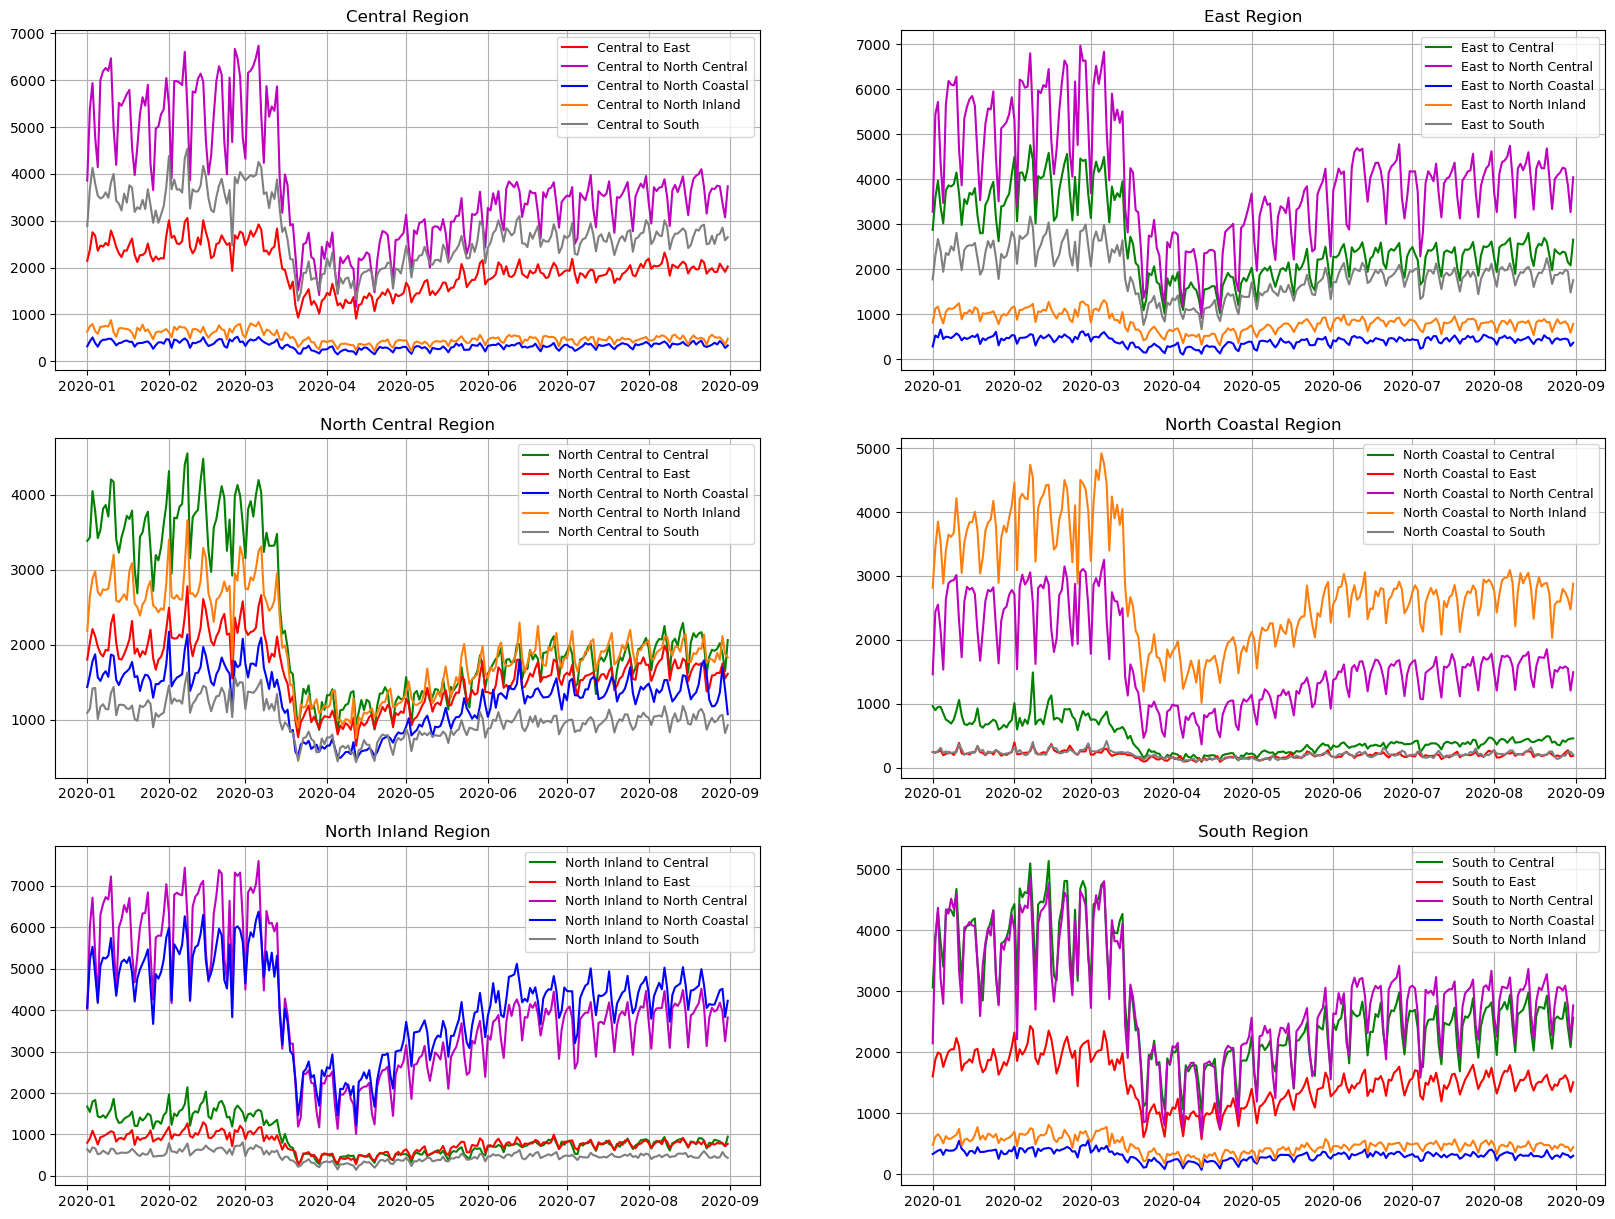

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))
ax1.set_title(f'Central Region')
ax1.plot(df['Date', 'Date'], df['Central', 'East'], label='Central to East', color = 'r')
ax1.plot(df['Date', 'Date'], df['Central', 'North Central'], label='Central to North Central', color = 'm')
ax1.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label='Central to North Coastal', color = 'b')
ax1.plot(df['Date', 'Date'], df['Central', 'North Inland'], label='Central to North Inland', color = 'tab:orange')
ax1.plot(df['Date', 'Date'], df['Central', 'South'], label='Central to South', color = 'tab:gray')
ax1.legend(loc='upper right', fontsize='9')
ax1.grid()

ax2.set_title(f'East Region')
ax2.plot(df['Date', 'Date'], df['East', 'Central'], label='East to Central', color = 'g')
ax2.plot(df['Date', 'Date'], df['East', 'North Central'], label='East to North Central', color = 'm')
ax2.plot(df['Date', 'Date'], df['East', 'North Coastal'], label='East to North Coastal', color = 'b')
ax2.plot(df['Date', 'Date'], df['East', 'North Inland'], label='East to North Inland', color = 'tab:orange')
ax2.plot(df['Date', 'Date'], df['East', 'South'], label='East to South', color = 'tab:gray')
ax2.legend(loc='upper right', fontsize='9')
ax2.grid()

ax3.set_title(f'North Central Region')
ax3.plot(df['Date', 'Date'], df['North Central', 'Central'], label='North Central to Central', color = 'g')
ax3.plot(df['Date', 'Date'], df['North Central', 'East'], label='North Central to East', color = 'r')
ax3.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label='North Central to North Coastal', color = 'b')
ax3.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label='North Central to North Inland', color = 'tab:orange')
ax3.plot(df['Date', 'Date'], df['North Central', 'South'], label='North Central to South', color = 'tab:gray')
ax3.legend(loc='upper right', fontsize='9')
ax3.grid()

ax4.set_title(f'North Coastal Region')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label='North Coastal to Central', color = 'g')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'East'], label='North Coastal to East', color = 'r')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label='North Coastal to North Central', color = 'm')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label='North Coastal to North Inland', color = 'tab:orange')
ax4.plot(df['Date', 'Date'], df['North Coastal', 'South'], label='North Coastal to South', color = 'tab:gray')
ax4.legend(loc='upper right', fontsize='9')
ax4.grid()

ax5.set_title(f'North Inland Region')
ax5.plot(df['Date', 'Date'], df['North Inland', 'Central'], label='North Inland to Central', color = 'g')
ax5.plot(df['Date', 'Date'], df['North Inland', 'East'], label='North Inland to East', color = 'r')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label='North Inland to North Central', color = 'm')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label='North Inland to North Coastal', color = 'b')
ax5.plot(df['Date', 'Date'], df['North Inland', 'South'], label='North Inland to South', color = 'tab:gray')
ax5.legend(loc='upper right', fontsize='9')
ax5.grid()

ax6.set_title(f'South Region')
ax6.plot(df['Date', 'Date'], df['South', 'Central'], label='South to Central', color = 'g')
ax6.plot(df['Date', 'Date'], df['South', 'East'], label='South to East', color = 'r')
ax6.plot(df['Date', 'Date'], df['South', 'North Central'], label='South to North Central', color = 'm')
ax6.plot(df['Date', 'Date'], df['South', 'North Coastal'], label='South to North Coastal', color = 'b')
ax6.plot(df['Date', 'Date'], df['South', 'North Inland'], label='South to North Inland', color = 'tab:orange')
ax6.legend(loc='upper right', fontsize='9')
ax6.grid()

plt.show()

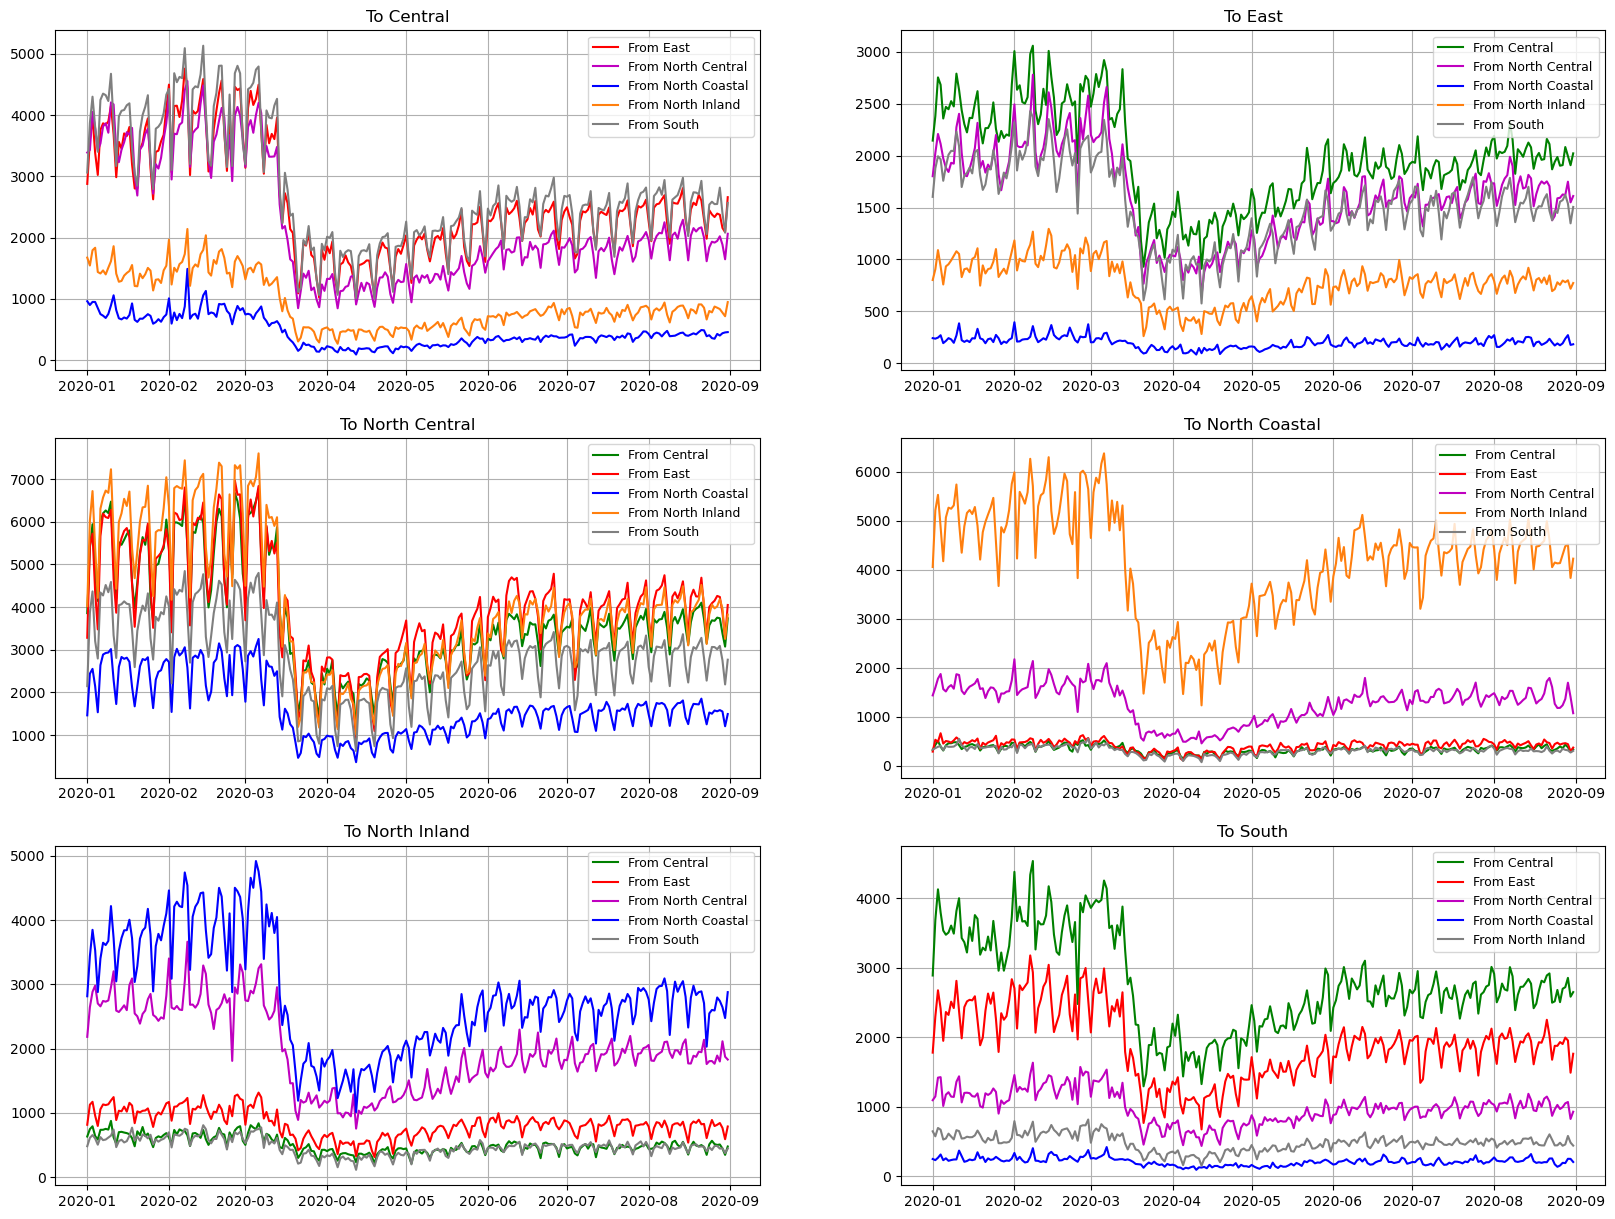

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))

ax1.set_title('To Central')
ax1.plot(df['Date', 'Date'], df['East', 'Central'], label = 'From East', color = 'r')
ax1.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'From North Central', color = 'm')
ax1.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'From North Coastal', color = 'b')
ax1.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'From North Inland', color = 'tab:orange')
ax1.plot(df['Date', 'Date'], df['South', 'Central'], label = 'From South', color = 'tab:gray')
ax1.legend(loc='upper right', fontsize='9')
ax1.grid()

ax2.set_title('To East')
ax2.plot(df['Date', 'Date'], df['Central', 'East'], label = 'From Central', color = 'g')
ax2.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'From North Central', color = 'm')
ax2.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'From North Coastal', color = 'b')
ax2.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'From North Inland', color = 'tab:orange')
ax2.plot(df['Date', 'Date'], df['South', 'East'], label = 'From South', color = 'tab:gray')
ax2.legend(loc='upper right', fontsize='9')
ax2.grid()

ax3.set_title('To North Central')
ax3.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'From Central', color = 'g')
ax3.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'From East', color = 'r')
ax3.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'From North Coastal', color = 'b')
ax3.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'From North Inland', color = 'tab:orange')
ax3.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'From South', color = 'tab:gray')
ax3.legend(loc='upper right', fontsize='9')
ax3.grid()

ax4.set_title('To North Coastal')
ax4.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'From Central', color = 'g')
ax4.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'From East', color = 'r')
ax4.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'From North Central', color = 'm')
ax4.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'From North Inland', color = 'tab:orange')
ax4.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'From South', color = 'tab:gray')
ax4.legend(loc='upper right', fontsize='9')
ax4.grid()

ax5.set_title('To North Inland')
ax5.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'From Central', color = 'g')
ax5.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'From East', color = 'r')
ax5.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'From North Central', color = 'm')
ax5.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'From North Coastal', color = 'b')
ax5.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'From South', color = 'tab:gray')
ax5.legend(loc='upper right', fontsize='9')
ax5.grid()

ax6.set_title('To South')
ax6.plot(df['Date', 'Date'], df['Central', 'South'], label = 'From Central', color = 'g')
ax6.plot(df['Date', 'Date'], df['East', 'South'], label = 'From East', color = 'r')
ax6.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'From North Central', color = 'm')
ax6.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'From North Coastal', color = 'b')
ax6.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'From North Inland', color = 'tab:gray')
ax6.legend(loc='upper right', fontsize='9')
ax6.grid()

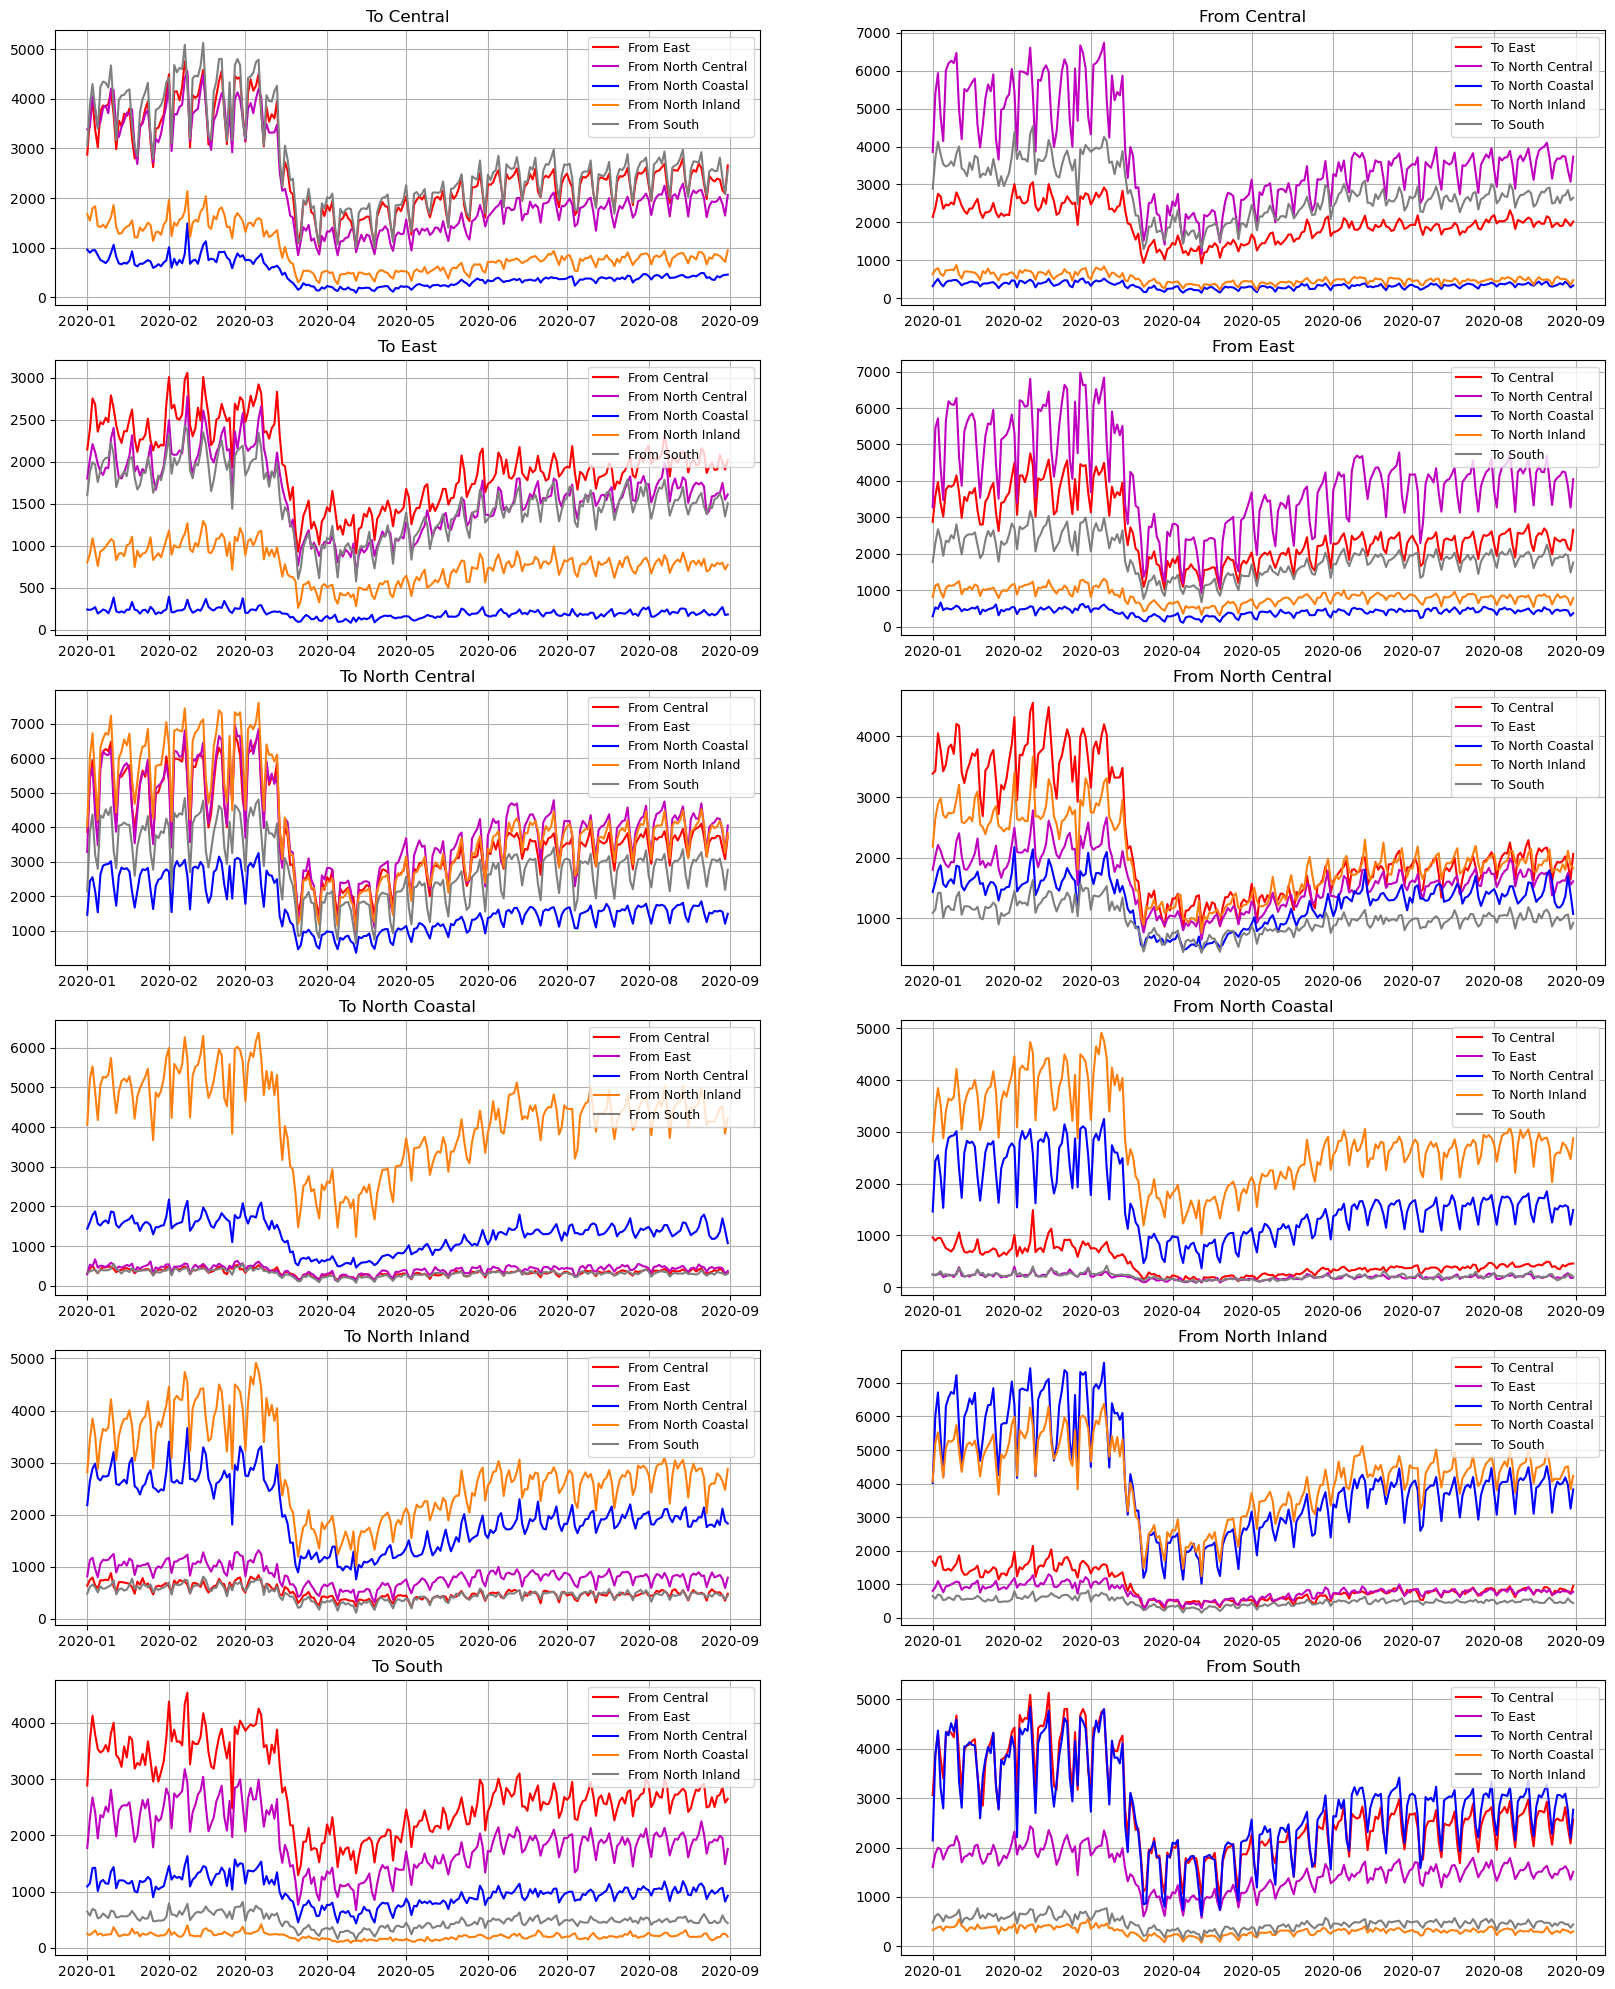

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(20, 25))

ax1.set_title('To Central')
ax1.plot(df['Date', 'Date'], df['East', 'Central'], label = 'From East', color = 'r')
ax1.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'From North Central', color = 'm')
ax1.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'From North Coastal', color = 'b')
ax1.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'From North Inland', color = 'tab:orange')
ax1.plot(df['Date', 'Date'], df['South', 'Central'], label = 'From South', color = 'tab:gray')
ax1.legend(loc='upper right', fontsize='9')
ax1.grid()

ax2.set_title('From Central')
ax2.plot(df['Date', 'Date'], df['Central', 'East'], label = 'To East', color = 'r')
ax2.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'To North Central', color = 'm')
ax2.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax2.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax2.plot(df['Date', 'Date'], df['Central', 'South'], label = 'To South', color = 'tab:gray')
ax2.legend(loc='upper right', fontsize='9')
ax2.grid()

ax3.set_title('To East')
ax3.plot(df['Date', 'Date'], df['Central', 'East'], label = 'From Central', color = 'r')
ax3.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'From North Central', color = 'm')
ax3.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'From North Coastal', color = 'b')
ax3.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'From North Inland', color = 'tab:orange')
ax3.plot(df['Date', 'Date'], df['South', 'East'], label = 'From South', color = 'tab:gray')
ax3.legend(loc='upper right', fontsize='9')
ax3.grid()

ax4.set_title('From East')
ax4.plot(df['Date', 'Date'], df['East', 'Central'], label = 'To Central', color = 'r')
ax4.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'To North Central', color = 'm')
ax4.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax4.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax4.plot(df['Date', 'Date'], df['East', 'South'], label = 'To South', color = 'tab:gray')
ax4.legend(loc='upper right', fontsize='9')
ax4.grid()

ax5.set_title('To North Central')
ax5.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'From Central', color = 'r')
ax5.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'From East', color = 'm')
ax5.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'From North Coastal', color = 'b')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'From North Inland', color = 'tab:orange')
ax5.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'From South', color = 'tab:gray')
ax5.legend(loc='upper right', fontsize='9')
ax5.grid()

ax6.set_title('From North Central')
ax6.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'To Central', color = 'r')
ax6.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'To East', color = 'm')
ax6.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax6.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax6.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'To South', color = 'tab:gray')
ax6.legend(loc='upper right', fontsize='9')
ax6.grid()

ax7.set_title('To North Coastal')
ax7.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'From Central', color = 'r')
ax7.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'From East', color = 'm')
ax7.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'From North Central', color = 'b')
ax7.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'From North Inland', color = 'tab:orange')
ax7.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'From South', color = 'tab:gray')
ax7.legend(loc='upper right', fontsize='9')
ax7.grid()

ax8.set_title('From North Coastal')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'To Central', color = 'r')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'To East', color = 'm')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'To North Central', color = 'b')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'To South', color = 'tab:gray')
ax8.legend(loc='upper right', fontsize='9')
ax8.grid()

ax9.set_title('To North Inland')
ax9.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'From Central', color = 'r')
ax9.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'From East', color = 'm')
ax9.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'From North Central', color = 'b')
ax9.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'From North Coastal', color = 'tab:orange')
ax9.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'From South', color = 'tab:gray')
ax9.legend(loc='upper right', fontsize='9')
ax9.grid()

ax10.set_title('From North Inland')
ax10.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'To Central', color = 'r')
ax10.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'To East', color = 'm')
ax10.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'To North Central', color = 'b')
ax10.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'To North Coastal', color = 'tab:orange')
ax10.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'To South', color = 'tab:gray')
ax10.legend(loc='upper right', fontsize='9')
ax10.grid()

ax11.set_title('To South')
ax11.plot(df['Date', 'Date'], df['Central', 'South'], label = 'From Central', color = 'r')
ax11.plot(df['Date', 'Date'], df['East', 'South'], label = 'From East', color = 'm')
ax11.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'From North Central', color = 'b')
ax11.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'From North Coastal', color = 'tab:orange')
ax11.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'From North Inland', color = 'tab:gray')
ax11.legend(loc='upper right', fontsize='9')
ax11.grid()

ax12.set_title('From South')
ax12.plot(df['Date', 'Date'], df['South', 'Central'], label = 'To Central', color = 'r')
ax12.plot(df['Date', 'Date'], df['South', 'East'], label = 'To East', color = 'm')
ax12.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'To North Central', color = 'b')
ax12.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'To North Coastal', color = 'tab:orange')
ax12.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'To North Inland', color = 'tab:gray')
ax12.legend(loc='upper right', fontsize='9')
ax12.grid()